In [0]:
from keras.datasets import imdb
from keras.layers import Dense,Conv1D,MaxPool1D,Embedding,Flatten
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
vocab_size = 5000
max_len = 300
(x,y),(x_t,y_t) = imdb.load_data(num_words=5000)

In [38]:
x_p = pad_sequences(x,maxlen=300,padding="pre")
x_p_t = pad_sequences(x_t,maxlen=300,padding = "pre")
print(x[0])
print(x_p[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    

In [55]:
model = Sequential()
model.add(Embedding(vocab_size,64,input_length=max_len))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 64)           320000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               4915456   
_________________________________________________________________
dense_11 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 5,251,969
Trainable params: 5,251,969
Non-trainable params: 0
_________________________________________________________________


In [56]:
encoder = OneHotEncoder(sparse=False)
y = y.reshape(-1,1)
y_p = encoder.fit_transform(y)
y

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [57]:
y_p

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [58]:
model.fit(x_p,y,epochs=5,validation_data=(x_p_t,y_t))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 12s 469us/step - loss: 0.3945 - acc: 0.8090 - val_loss: 0.2912 - val_acc: 0.8768
Epoch 2/5
25000/25000 [==============================] - 11s 442us/step - loss: 0.1083 - acc: 0.9612 - val_loss: 0.4369 - val_acc: 0.8478
Epoch 3/5
25000/25000 [==============================] - 11s 440us/step - loss: 0.0282 - acc: 0.9903 - val_loss: 0.5747 - val_acc: 0.8512
Epoch 4/5
25000/25000 [==============================] - 11s 440us/step - loss: 0.0198 - acc: 0.9926 - val_loss: 0.6730 - val_acc: 0.8451
Epoch 5/5
25000/25000 [==============================] - 11s 452us/step - loss: 0.0182 - acc: 0.9937 - val_loss: 0.7142 - val_acc: 0.8496


In [0]:
h = model.history.history

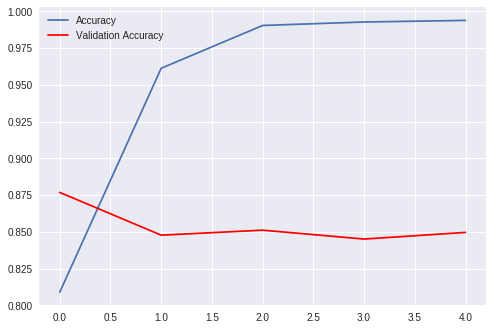

In [61]:
plt.style.use("seaborn")
plt.plot(h["acc"],label = "Accuracy")
plt.plot(h["val_acc"],label = "Validation Accuracy",c="r")
plt.legend()
plt.show()

## Implementation of CNN

In [71]:
model2 = Sequential()
model2.add(Embedding(5000,64,input_length=300))
model2.add(Conv1D(filters=32,kernel_size=30))
model2.add(MaxPool1D(pool_size=271))
model2.add(Flatten())
model2.add(Dense(256,activation="relu"))
model2.add(Dense(64,activation = "relu"))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 300, 64)           320000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 271, 32)           61472     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total para

In [72]:
model2.fit(x_p,y,epochs=3,validation_data=(x_p_t,y_t))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 13s 520us/step - loss: 0.4022 - acc: 0.7982 - val_loss: 0.3531 - val_acc: 0.8454
Epoch 2/3
25000/25000 [==============================] - 12s 483us/step - loss: 0.1937 - acc: 0.9264 - val_loss: 0.3339 - val_acc: 0.8634
Epoch 3/3
25000/25000 [==============================] - 12s 487us/step - loss: 0.0730 - acc: 0.9758 - val_loss: 0.3756 - val_acc: 0.8701


In [0]:
h2 = model2.history.history

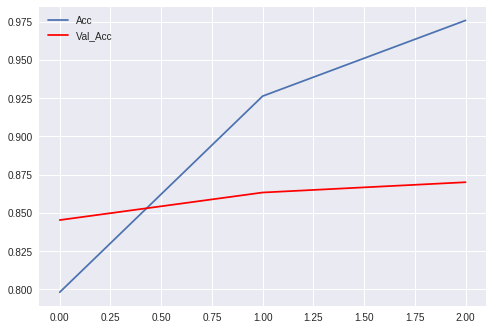

In [74]:
plt.style.use("seaborn")
plt.plot(h2["acc"],label = "Acc")
plt.plot(h2["val_acc"],label = "Val_Acc",c='r')
plt.legend()
plt.show()